# Image processing with Python
[Original course is here](https://datacarpentry.org/image-processing/09-contours/)

[Get your DPI here](https://www.infobyip.com/detectmonitordpi.php)

In [46]:
import os
imgs = os.path.join("..", "data")  # directory with images
img1 = os.path.join(imgs, "2019.11.14_contours_junk.jpg")
img2 = os.path.join(imgs, "2019.11.14_contours_dice.jpg")

my_dpi = 96  # dots per inch

## Contours

In [47]:
%%bash -s "$imgs" "$img1" "$img2"

# Create directory if it does not exist
if [ ! -d $1 ]
then
    mkdir $1
fi

# Get necessary images
if [ ! -f $2 ]
then
    wget https://datacarpentry.org/image-processing/fig/06-junk-before.jpg -O $2
fi

if [ ! -f $3 ]
then
    wget https://datacarpentry.org/image-processing/fig/08-dice.jpg -O $3
fi

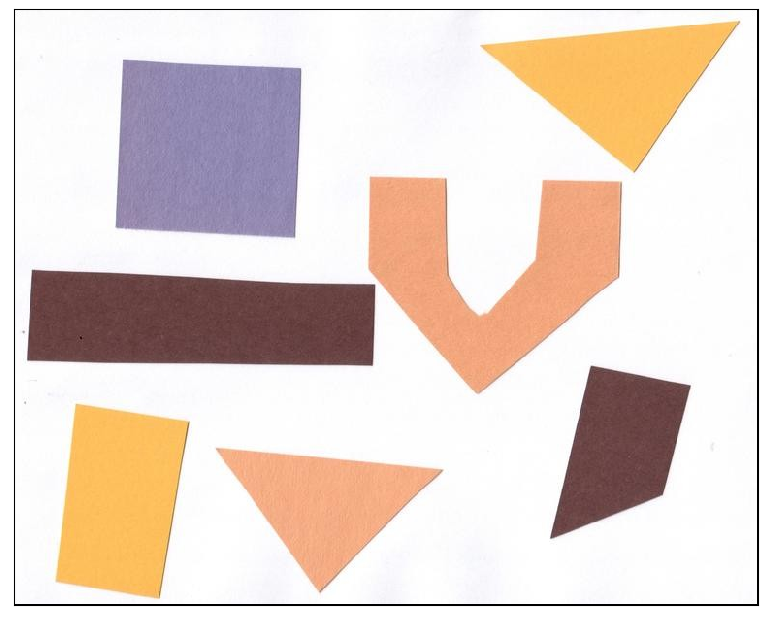

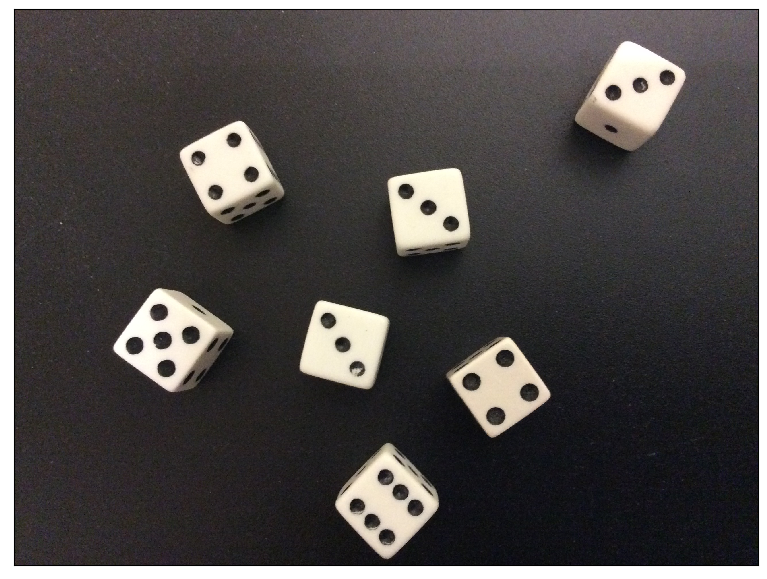

In [65]:
import cv2
from matplotlib import pyplot as plt


def get_size(image):
    """ Return image size in inches """
    size = image.shape[1::-1]  # image size in pixels
    return tuple(map(lambda x: int(x / my_dpi), size))


def get_image(name):
    """ Get image from path """
    image = cv2.imread(name)  # read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    return image


def get_gray(name):
    """ Get image from path """
    image = cv2.imread(name)  # read image
    # Convert BGR to gray
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image


def show_image(image):
    """ Show image in Jupyter Notebook """
    plt.rcParams['figure.dpi'] = my_dpi  # set DPI
    plt.figure(figsize=(10, 10))  # set image size in inches
    plt.xticks([])  # hide x axis values
    plt.yticks([])  # hide y axis values
    plt.imshow(image)
    plt.show

    
def show_hist(name):
    """ Show histogram from image path """
    image = get_gray(name)
    plt.rcParams['figure.dpi'] = my_dpi  # set DPI
    plt.figure(figsize=(10, 10))  # set size in inches
    plt.hist(image.ravel(), bins=256)
    plt.show

show_image(get_image(img1))
show_image(get_image(img2))

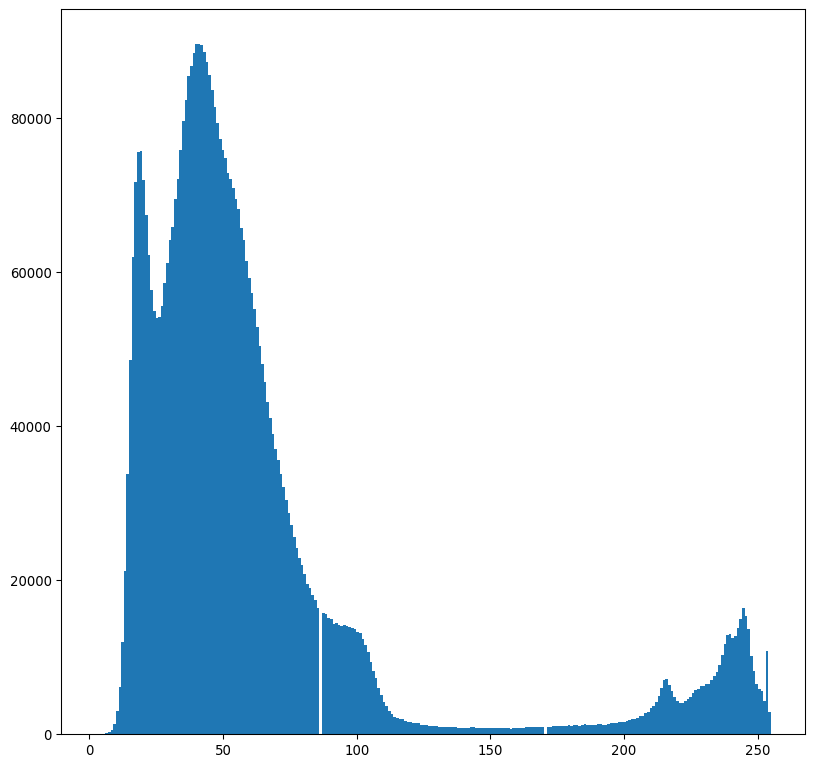

In [66]:
# Show histogram for dice image
show_hist(img2)

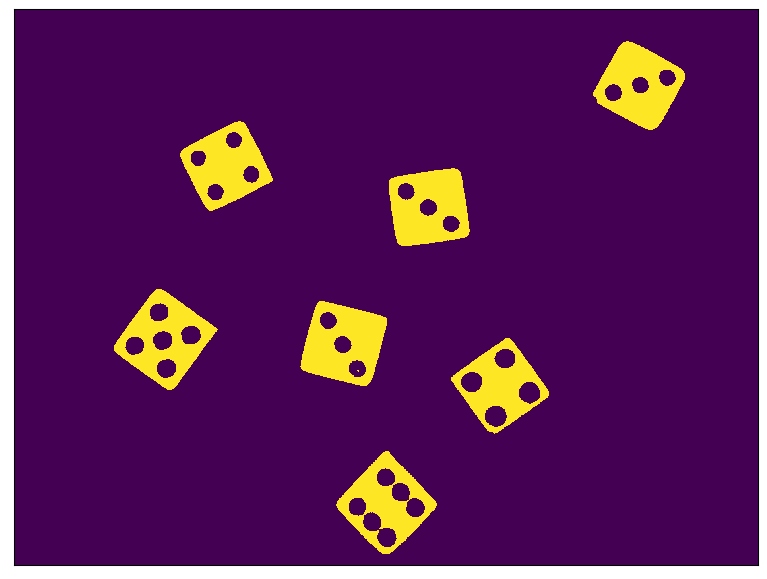

In [70]:
# Create and show binary image
threshold = 200
gray = get_gray(img2)
blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
(t, binary) = cv2.threshold(src=blur, thresh=threshold,
                            maxval=255, type=cv2.THRESH_BINARY)
show_image(binary)

In [74]:
# Find the contours, based on the binary image of the dice
contours, hierarchy = cv2.findContours(
    image=binary, 
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_SIMPLE)